# Wrangle and Analyze Data Project

## Objective
wrangle WeRateDogs Twitter data to create interesting and trustworthy analyses and visualizations

## Available Data
1) Enhanced Twitter Archive data ---> twitter_archive_enhanced.csv           <br>2) Additional Data via the Twitter API ---> tweet_json.txt
<br>3) Image Predictions File from a neural network ---> image_predictions.tsv

##  Required Tasks
<br>1) Gathering data
<br>2) Assessing data
<br>3) Cleaning data
<br>4) Storing, analyzing, and visualizing your wrangled data
<br>5) Reporting on your data wrangling efforts 
<br>6) Reporting on your data analyses and visualizations

In [1]:
# import statements
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer
import re

%matplotlib inline

##  Task(1): Gathering Data:

In [2]:
# Task 1: Gathering Data (Cell 1/4)
df_TwitterArchive = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
# Task 1: Gathering Data (Cell 2/4)

# sending get request and saving the response
URL = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(URL) 

#Open file in write binary mode and write the content of the response in bytes
with open('image_predictions.tsv', 'wb') as f: 
    f.write(response.content)

#Read the file as a dataframe
df_ImagePredictions = pd.read_csv('image_predictions.tsv', sep='\t')

In [4]:
# Task 1: Gathering Data (Cell 4/4)
# Read the sent tweet-json file to dataframe
df_list = []

with open('tweet-json.txt') as tweetfile:
    for line in tweetfile:
        tweetdata = json.loads(line)
        
        tweet_id = tweetdata['id']
        favorite_count = tweetdata['favorite_count']
        retweet_count = tweetdata['retweet_count']
                
        df_list.append({'tweet_id': tweet_id,
                        'favorite_count': favorite_count,
                        'retweet_count': retweet_count})

# create a new DataFrame 
df_TweetData = pd.DataFrame(df_list, columns = ['tweet_id', 'favorite_count', 'retweet_count'])

# Save the dataFrame in file
df_TweetData.to_csv('tweet-json-edited.txt', encoding = 'utf-8', index=False)

##  Gathering Data Summary:
We started this section with three files [twitter-archive-enhanced.csv, image_predictions.tsv, tweet-json.txt ] and we extracted three dataframes from them [df_TwitterArchive, df_ImagePredictions, df_TweetData] respectively.


##  Task(2): Assessing Data:

In [5]:
# Task 2: Assessing Data (Cell 1/6)
# Twitter Archive Data (Cell 1/2)
print("Random samples from Twitter Archive Data:")
print(df_TwitterArchive.sample(5))  #Assess 5 random rows of data
print("Shape of Twitter Archive Data:")
print(df_TwitterArchive.shape)      #Display the shape of the data
print("Summary of Twitter Archive Data:")
print(df_TwitterArchive.info())     #Display data summary
print("Number of duplicates in Twitter Archive Data is {}".format(sum(df_TwitterArchive.duplicated())))   #Display number of duplicates

Random samples from Twitter Archive Data:
                tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
230   847978865427394560                    NaN                  NaN   
1208  715704790270025728                    NaN                  NaN   
1819  676590572941893632           6.765883e+17         4.196984e+09   
1625  684830982659280897                    NaN                  NaN   
711   784517518371221505                    NaN                  NaN   

                      timestamp  \
230   2017-04-01 01:08:10 +0000   
1208  2016-04-01 00:58:13 +0000   
1819  2015-12-15 02:32:17 +0000   
1625  2016-01-06 20:16:44 +0000   
711   2016-10-07 22:15:26 +0000   

                                                 source  \
230   <a href="http://twitter.com/download/iphone" r...   
1208  <a href="http://vine.co" rel="nofollow">Vine -...   
1819  <a href="http://twitter.com/download/iphone" r...   
1625  <a href="http://vine.co" rel="nofollow">Vine -...   
711   <a href="http

In [6]:
# Task 2: Assessing Data (Cell 2/6)
# Twitter Archive Data (Cell 2/2)
# Print the unique values of some importent columns
print("Unique values at (source) column:")
print(df_TwitterArchive.source.unique())
print("***********************************")
print("Unique values at (rating_numerator) column:")
print(df_TwitterArchive.rating_numerator.unique())
print("***********************************")
print("Unique values at (rating_denominator) column:")
print(df_TwitterArchive.rating_denominator.unique())
print("***********************************")
print("Unique values at (name) column:")
print(df_TwitterArchive.name.unique())
print("***********************************")
print("Unique values at (doggo) column:")
print(df_TwitterArchive.doggo.unique())
print("***********************************")
print("Unique values at (floofer) column:")
print(df_TwitterArchive.floofer.unique())
print("***********************************")
print("Unique values at (pupper) column:")
print(df_TwitterArchive.pupper.unique())
print("***********************************")
print("Unique values at (puppo) column:")
print(df_TwitterArchive.puppo.unique())
print("***********************************")


Unique values at (source) column:
[ '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>'
 '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>'
 '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>'
 '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>']
***********************************
Unique values at (rating_numerator) column:
[  13   12   14    5   17   11   10  420  666    6   15  182  960    0   75
    7   84    9   24    8    1   27    3    4  165 1776  204   50   99   80
   45   60   44  143  121   20   26    2  144   88]
***********************************
Unique values at (rating_denominator) column:
[ 10   0  15  70   7  11 150 170  20  50  90  80  40 130 110  16 120   2]
***********************************
Unique values at (name) column:
['Phineas' 'Tilly' 'Archie' 'Darla' 'Franklin' 'None' 'Jax' 'Zoey' 'Cassie'
 'Koda' 'Bruno' 'Ted' 'Stuart' 'Oliver' 'Jim' 'Zeke' 'Ralphus' 'Canela

In [7]:
# Task 2: Assessing Data (Cell 3/6)
# Image Predictions Data (Cell 1/2)
print("Random samples from Image Predictions Data:")
print(df_ImagePredictions.sample(5))   #Assess 5 random rows of data
print("Shape of Image Predictions Data:")
print(df_ImagePredictions.shape)       #Display the shape of the data
print("Summary of Image Predictions Data:")
print(df_ImagePredictions.info())      #Display data summary
print("Number of duplicates in Image Predictions Data is {}".format(sum(df_ImagePredictions.duplicated())))   #Display number of duplicates

Random samples from Image Predictions Data:
                tweet_id                                          jpg_url  \
1830  836260088725786625  https://pbs.twimg.com/media/C5r-G2IUwAA6KBY.jpg   
1725  820078625395449857  https://pbs.twimg.com/media/C2GBJADWIAQvcNb.jpg   
1647  808733504066486276  https://pbs.twimg.com/media/Czky0v9VIAEXRkd.jpg   
945   704480331685040129  https://pbs.twimg.com/media/CcbRIAgXIAQaKHQ.jpg   
502   675870721063669760  https://pbs.twimg.com/media/CWEs1b-WEAEhq82.jpg   

      img_num                p1   p1_conf  p1_dog                      p2  \
1830        1            borzoi  0.564688    True                ice_bear   
1725        3        school_bus  0.999833   False                     cab   
1647        1         seat_belt  0.779137   False              toy_poodle   
945         1           Samoyed  0.979206    True              Pomeranian   
502         1  golden_retriever  0.263892    True  Welsh_springer_spaniel   

       p2_conf  p2_dog        

In [8]:
# Task 2: Assessing Data (Cell 4/6)
# Image Predictions Data (Cell 2/2)
# Print the unique values of some importent columns
print("Unique values at (img_num) column:")
print(df_ImagePredictions.img_num.unique())
print("***********************************")
print("Unique values at (p1) column:")
print(df_ImagePredictions.p1.unique())
print("***********************************")
print("Unique values at (p1_conf) column:")
print(df_ImagePredictions.p1_conf.unique())
print("***********************************")
print("Unique values at (p1_dog) column:")
print(df_ImagePredictions.p1_dog.unique())
print("***********************************")
print("Unique values at (p2) column:")
print(df_ImagePredictions.p2.unique())
print("***********************************")
print("Unique values at (p2_conf) column:")
print(df_ImagePredictions.p2_conf.unique())
print("***********************************")
print("Unique values at (p2_dog) column:")
print(df_ImagePredictions.p2_dog.unique())
print("***********************************")
print("Unique values at (p3) column:")
print(df_ImagePredictions.p3.unique())
print("***********************************")
print("Unique values at (p3_conf) column:")
print(df_ImagePredictions.p3_conf.unique())
print("***********************************")
print("Unique values at (p3_dog) column:")
print(df_ImagePredictions.p3_dog.unique())
print("***********************************")

Unique values at (img_num) column:
[1 4 2 3]
***********************************
Unique values at (p1) column:
['Welsh_springer_spaniel' 'redbone' 'German_shepherd' 'Rhodesian_ridgeback'
 'miniature_pinscher' 'Bernese_mountain_dog' 'box_turtle' 'chow'
 'shopping_cart' 'miniature_poodle' 'golden_retriever' 'Gordon_setter'
 'Walker_hound' 'pug' 'bloodhound' 'Lhasa' 'English_setter' 'hen'
 'desktop_computer' 'Italian_greyhound' 'Maltese_dog' 'three-toed_sloth'
 'ox' 'malamute' 'guinea_pig' 'soft-coated_wheaten_terrier' 'Chihuahua'
 'black-and-tan_coonhound' 'coho' 'toy_terrier' 'Blenheim_spaniel'
 'Pembroke' 'llama' 'Chesapeake_Bay_retriever' 'curly-coated_retriever'
 'dalmatian' 'Ibizan_hound' 'Border_collie' 'Labrador_retriever'
 'seat_belt' 'snail' 'miniature_schnauzer' 'Airedale' 'triceratops' 'swab'
 'hay' 'hyena' 'jigsaw_puzzle' 'West_Highland_white_terrier' 'toy_poodle'
 'giant_schnauzer' 'vizsla' 'vacuum' 'Rottweiler' 'Siberian_husky' 'teddy'
 'papillon' 'Saint_Bernard' 'porcupine

In [9]:
# Task 2: Assessing Data (Cell 5/6)
# Tweet Data (Cell 1/2)
print("Random samples from Tweet Data:")
print(df_TweetData.sample(5))   #Assess 5 random rows of data
print("Shape of Tweet Data:")
print(df_TweetData.shape)       #Display the shape of the data
print("Summary of Tweet Data:")
print(df_TweetData.info())      #Display data summary
print("Number of duplicates in Tweet Data is {}".format(sum(df_TweetData.duplicated())))   #Display number of duplicates

Random samples from Tweet Data:
                tweet_id  favorite_count  retweet_count
878   760539183865880579            8399           4168
1754  678767140346941444            3864           1553
1303  707387676719185920            3835           1490
1415  698549713696649216            2536            704
1569  687704180304273409            2660            950
Shape of Tweet Data:
(2354, 3)
Summary of Tweet Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null int64
favorite_count    2354 non-null int64
retweet_count     2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB
None
Number of duplicates in Tweet Data is 0


In [10]:
# Task 2: Assessing Data (Cell 6/6)
# # Tweet Data (Cell 2/2)
# Print the unique values of some importent columns
print("Unique values at (favorite_count) column:")
print(df_TweetData.favorite_count.unique())
print("***********************************")
print("Unique values at (retweet_count) column:")
print(df_TweetData.retweet_count.unique())
print("***********************************")

Unique values at (favorite_count) column:
[39467 33819 25461 ...,   128   132  2535]
***********************************
Unique values at (retweet_count) column:
[8853 6514 4328 ...,  879   41  147]
***********************************


#  Assessing Data Summary:
## Tidiness Issues:
1. Merging all 3 dataframes to 1 master dataframe.
2. **At Twitter Archive Data:** There is no need for 4 columns to describe dog_stage
3. **At Image Predictions Data:** There is no need for 3 predictions, just choose the first dog prediciton

## Quality Issues:
1. **source** is not readable, so we need to clean them.
2. **jpg_url**, remove tweets without images.
3. **retweeted_status_id** contains the retweets which sholud be removed from our analysis
4. Remove all tweets where there is no a dog prediciton in image prediciton data, so that they will not affect our analysis.
5. **rating_denominator** is not always 10 as it should be.
6. **name** has some improper names as [None, such, a, quite, not, one, an, very, O, just, getting, my, unacceptable, this, his, all, old, by, officially, the]
7. Incorrect Datatypes:
<br> **Columns to be changed to string:** tweet_id, in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id
<br> **Columns to be changed to float:** rating_numerator, rating_denominator
<br> **Columns to be changed to datatime:** timestamp, retweeted_status_timestamp
8. Missing Value issue: 
<br> **At Twitter Archive Data:** The following colums has missing values [in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls]
<br> df_ImagePredictions and df_TweetData are smaller than df_TwitterArchive
9. Removing all unnecessary columns to our analysis as [img_num, in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls]


##  Task(3): Cleaning Data:

In [11]:
# Task 3: cleaning Data (Cell 1/13)
#Copy Dataframes before performing any processing steps on data
df_TwitterArchive_clean = df_TwitterArchive.copy()
df_ImagePredictions_clean = df_ImagePredictions.copy()
df_TweetData_clean= df_TweetData.copy()

In [12]:
# Task 3: cleaning Data (Cell 2/13)
# Tidiness issue (1): Merging all 3 dataframes to 1 master dataframe.

#Define: we have data corresponding to the same tweet in different datasets.
#        we need to gather those information in one master dataset.

#Code:
df_clean = pd.merge(left=df_TwitterArchive_clean,right=df_ImagePredictions_clean, left_on='tweet_id', right_on='tweet_id', how='inner')
df_clean = df_clean.merge(df_TweetData_clean, on='tweet_id', how='inner')

#Test:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 30 columns):
tweet_id                      2073 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2073 non-null object
source                        2073 non-null object
text                          2073 non-null object
retweeted_status_id           79 non-null float64
retweeted_status_user_id      79 non-null float64
retweeted_status_timestamp    79 non-null object
expanded_urls                 2073 non-null object
rating_numerator              2073 non-null int64
rating_denominator            2073 non-null int64
name                          2073 non-null object
doggo                         2073 non-null object
floofer                       2073 non-null object
pupper                        2073 non-null object
puppo                         2073 non-null object
jpg_url                       2073 

In [13]:
# Task 3: cleaning Data (Cell 3/13)
# Tidiness issue (2): There is no need for 4 columns to describe dog_stage.

#Define: we have 4 columns that contains the dog stage (doggo, floofer, pupper, pupper).
#        Each of those columns contains only 2 values (None or dog stage)
#        we need only 1 column (dog_stage) that contain ths dog stage(s).

#Code:
#Remove None keyword
df_clean.loc[df_clean.doggo == 'None', 'doggo'] = ' '
df_clean.loc[df_clean.floofer == 'None', 'floofer'] = ' '
df_clean.loc[df_clean.pupper == 'None', 'pupper'] = ' '
df_clean.loc[df_clean.puppo == 'None', 'puppo'] = ' '

#Combine the columns to (dog_stage) column
df_clean['dog_stage'] = df_clean.doggo+' '+df_clean.floofer+' '+df_clean.pupper+' '+df_clean.puppo
df_clean['dog_stage'] = df_clean['dog_stage'].str.strip()
df_clean['dog_stage'] = df_clean['dog_stage'].str.replace("     ", " ")
df_clean['dog_stage'] = df_clean['dog_stage'].str.replace("   ", " ")
df_clean['dog_stage'] = df_clean['dog_stage'].str.replace("  ", " ")
df_clean['dog_stage'] = df_clean['dog_stage'].replace("", "None")

#Remove unnecessary columns
del df_clean['doggo']
del df_clean['floofer']
del df_clean['pupper']
del df_clean['puppo']

#Test:
print("Summary of cleaned Data:") #To insure unnecessary columns removal.
print(df_clean.info())
print("Unique values at (dog_stage) column:") #To insure correct combination
print(df_clean.dog_stage.unique())

Summary of cleaned Data:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 27 columns):
tweet_id                      2073 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2073 non-null object
source                        2073 non-null object
text                          2073 non-null object
retweeted_status_id           79 non-null float64
retweeted_status_user_id      79 non-null float64
retweeted_status_timestamp    79 non-null object
expanded_urls                 2073 non-null object
rating_numerator              2073 non-null int64
rating_denominator            2073 non-null int64
name                          2073 non-null object
jpg_url                       2073 non-null object
img_num                       2073 non-null int64
p1                            2073 non-null object
p1_conf                       2073 non-null float64
p1_dog    

In [14]:
# Task 3: cleaning Data (Cell 4/13)
# Tidiness issue (3): There is no need for 3 predictions, just choose the first dog prediciton

#Define: we have 3 predictions and (px_dog) determine if the prediction is a dog or not.
#        we should pick only the predictions that contain dogs
#        we will have only 2 columns (prediction, prediction_confidence) instead of the 6 exicting columns.

#Code:
prediction = []
prediction_confidence = []

#Function to select the first dog prediction
def prediction_function(dataframe):  
    if dataframe['p1_dog'] == True:
        prediction.append(dataframe['p1'])
        prediction_confidence.append(dataframe['p1_conf'])
    elif dataframe['p2_dog'] == True:
        prediction.append(dataframe['p2'])
        prediction_confidence.append(dataframe['p2_conf'])
    elif dataframe['p3_dog'] == True:
        prediction.append(dataframe['p3'])
        prediction_confidence.append(dataframe['p3_conf'])
    else:
        prediction.append('Not A Dog')
        prediction_confidence.append(1)

#Apply function to the dataframe, and create the new columns
df_clean.apply(prediction_function, axis=1)
df_clean['prediction'] = prediction
df_clean['prediction_confidence'] = prediction_confidence

#Remove unnecessary columns
del df_clean['p1_dog']
del df_clean['p2_dog']
del df_clean['p3_dog']
del df_clean['p1_conf']
del df_clean['p2_conf']
del df_clean['p3_conf']
del df_clean['p1']
del df_clean['p2']
del df_clean['p3']

#Test:
print("Summary of cleaned Data:") #To insure unnecessary columns removal.
print(df_clean.info())
print("Unique values at (prediction) column:") #To insure correct values
print(df_clean.prediction.unique())
print("**************************")
print("Unique values at (prediction_confidence) column:") #To insure correct values
print(df_clean.prediction_confidence.unique())

Summary of cleaned Data:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 20 columns):
tweet_id                      2073 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2073 non-null object
source                        2073 non-null object
text                          2073 non-null object
retweeted_status_id           79 non-null float64
retweeted_status_user_id      79 non-null float64
retweeted_status_timestamp    79 non-null object
expanded_urls                 2073 non-null object
rating_numerator              2073 non-null int64
rating_denominator            2073 non-null int64
name                          2073 non-null object
jpg_url                       2073 non-null object
img_num                       2073 non-null int64
favorite_count                2073 non-null int64
retweet_count                 2073 non-null int64
dog_stage    

In [15]:
# Task 3: cleaning Data (Cell 5/13)
# Quality issue (1): source is not readable, so we need to clean them.

#Define: The source column has only 3 different values 
#        [Twitter Web Client, Twitter for iphone, TweetDeck]
#        we need to clean the column and remove all repeated parts.

#Code:
df_clean['source'] = df_clean['source'].apply(lambda x: re.findall(r'>(.*)<', x)[0])

#Test:
print("Unique values at (source) column:") #To insure correct values
print(df_clean.source.unique())

Unique values at (source) column:
['Twitter for iPhone' 'Twitter Web Client' 'TweetDeck']


In [16]:
# Task 3: cleaning Data (Cell 6/13)
# Quality issue (2): jpg_url, remove tweets without images.

#Define: The dataset contains some tweets that have no images to be rated.
#       they have to be removed, so that they will not affect our analysis. 

#Code:
df_clean = df_clean.dropna(subset = ['jpg_url'])

#Test:
print("Summary of cleaned Data:") #To insure the decrease in row number.
print(df_clean.info())
print("Unique values at (jpg_url) column:") #To insure correct values
print(df_clean.jpg_url.unique())

Summary of cleaned Data:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 20 columns):
tweet_id                      2073 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2073 non-null object
source                        2073 non-null object
text                          2073 non-null object
retweeted_status_id           79 non-null float64
retweeted_status_user_id      79 non-null float64
retweeted_status_timestamp    79 non-null object
expanded_urls                 2073 non-null object
rating_numerator              2073 non-null int64
rating_denominator            2073 non-null int64
name                          2073 non-null object
jpg_url                       2073 non-null object
img_num                       2073 non-null int64
favorite_count                2073 non-null int64
retweet_count                 2073 non-null int64
dog_stage    

In [17]:
# Task 3: cleaning Data (Cell 7/13)
# Quality issue (3): retweeted_status_id contains the retweets which sholud 
#                    be removed from our analysis 

#Define: The dataset contains some retweets, they should be removed
#       so that they will not affect our analysis. 

#Code:
df_clean = df_clean[pd.isnull(df_clean.retweeted_status_id)]

#Test:
print("Summary of cleaned Data:") #To insure the decrease in row number.
print(df_clean.info())
print("Unique values at (retweeted_status_id) column:") #To insure correct values
print(df_clean.retweeted_status_id.unique())

Summary of cleaned Data:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2072
Data columns (total 20 columns):
tweet_id                      1994 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     1994 non-null object
source                        1994 non-null object
text                          1994 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1994 non-null object
rating_numerator              1994 non-null int64
rating_denominator            1994 non-null int64
name                          1994 non-null object
jpg_url                       1994 non-null object
img_num                       1994 non-null int64
favorite_count                1994 non-null int64
retweet_count                 1994 non-null int64
dog_stage       

In [18]:
# Task 3: cleaning Data (Cell 8/13)
# Quality issue (4): Remove all tweets where there is no a dog prediciton 
#in image prediciton data, so that they will not affect our analysis.

#Define: In the prediction column we have (Not_a_dog) value.
#        We have to remove those tweets (rows) 

#Code:
df_clean = df_clean[df_clean.prediction != 'Not A Dog']

#Test:
print("Summary of cleaned Data:") #To insure the decrease in row number.
print(df_clean.info())
print("Unique values at (prediction) column:") #To insure correct values
print(df_clean.prediction.unique())

Summary of cleaned Data:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1686 entries, 1 to 2072
Data columns (total 20 columns):
tweet_id                      1686 non-null int64
in_reply_to_status_id         20 non-null float64
in_reply_to_user_id           20 non-null float64
timestamp                     1686 non-null object
source                        1686 non-null object
text                          1686 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1686 non-null object
rating_numerator              1686 non-null int64
rating_denominator            1686 non-null int64
name                          1686 non-null object
jpg_url                       1686 non-null object
img_num                       1686 non-null int64
favorite_count                1686 non-null int64
retweet_count                 1686 non-null int64
dog_stage       

In [19]:
# Task 3: cleaning Data (Cell 9/13)
# Quality issue (5): rating_denominator is not always 10 as it should be.

#Define: As stated in the project overview, the rating denominator should be 10.
#        We have to remove those tweets (rows) where the rating denominator is not 10.

#Code:
df_clean = df_clean[df_clean.rating_denominator == 10]

#Test:
print("Summary of cleaned Data:") #To insure the decrease in row number.
print(df_clean.info())
print("Unique values at (rating_denominator) column:") #To insure correct values
print(df_clean.rating_denominator.unique())

Summary of cleaned Data:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1669 entries, 1 to 2072
Data columns (total 20 columns):
tweet_id                      1669 non-null int64
in_reply_to_status_id         19 non-null float64
in_reply_to_user_id           19 non-null float64
timestamp                     1669 non-null object
source                        1669 non-null object
text                          1669 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1669 non-null object
rating_numerator              1669 non-null int64
rating_denominator            1669 non-null int64
name                          1669 non-null object
jpg_url                       1669 non-null object
img_num                       1669 non-null int64
favorite_count                1669 non-null int64
retweet_count                 1669 non-null int64
dog_stage       

In [20]:
# Task 3: cleaning Data (Cell 10/13)
# Quality issue (6): name has some improper names as [None, such, a, quite, 
#                    not, one, an, very, O, just, getting, my, unacceptable, 
#                    this, his, all, old, by, officially, the]

#Define: The name column has some invalid names that should be removed. 

#Code:
df_clean = df_clean[df_clean.name != 'None']
df_clean = df_clean[df_clean.name != 'such']
df_clean = df_clean[df_clean.name != 'a']
df_clean = df_clean[df_clean.name != 'quite']
df_clean = df_clean[df_clean.name != 'not']
df_clean = df_clean[df_clean.name != 'one']
df_clean = df_clean[df_clean.name != 'an']
df_clean = df_clean[df_clean.name != 'very']
df_clean = df_clean[df_clean.name != 'o']
df_clean = df_clean[df_clean.name != 'just']
df_clean = df_clean[df_clean.name != 'getting']
df_clean = df_clean[df_clean.name != 'my']
df_clean = df_clean[df_clean.name != 'unacceptable']
df_clean = df_clean[df_clean.name != 'this']
df_clean = df_clean[df_clean.name != 'his']
df_clean = df_clean[df_clean.name != 'all']
df_clean = df_clean[df_clean.name != 'old']
df_clean = df_clean[df_clean.name != 'by']
df_clean = df_clean[df_clean.name != 'officially']
df_clean = df_clean[df_clean.name != 'the']

#Test:
print("Summary of cleaned Data:") #To insure the decrease in row number.
print(df_clean.info())
print("Unique values at (name) column:") #To insure correct values
print(df_clean.name.unique())

Summary of cleaned Data:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1189 entries, 1 to 2042
Data columns (total 20 columns):
tweet_id                      1189 non-null int64
in_reply_to_status_id         1 non-null float64
in_reply_to_user_id           1 non-null float64
timestamp                     1189 non-null object
source                        1189 non-null object
text                          1189 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1189 non-null object
rating_numerator              1189 non-null int64
rating_denominator            1189 non-null int64
name                          1189 non-null object
jpg_url                       1189 non-null object
img_num                       1189 non-null int64
favorite_count                1189 non-null int64
retweet_count                 1189 non-null int64
dog_stage         

In [21]:
# Task 3: cleaning Data (Cell 11/13)
# Quality issue (7): Incorrect Datatypes:
#                    Columns to be changed to string: 
#                       tweet_id, in_reply_to_status_id, in_reply_to_user_id,
#                       retweeted_status_id, retweeted_status_user_id
#                    Columns to be changed to float: 
#                       rating_numerator, rating_denominator
#                    Columns to be changed to datatime: 
#                       timestamp, retweeted_status_timestamp

#Define: The dataset contains some columns that have invalid data type.

#Code:
df_clean['tweet_id'] = df_clean['tweet_id'].astype(str)
df_clean['in_reply_to_status_id'] = df_clean['in_reply_to_status_id'].astype(str)
df_clean['in_reply_to_user_id'] = df_clean['in_reply_to_user_id'].astype(str)
df_clean['retweeted_status_id'] = df_clean['retweeted_status_id'].astype(str)
df_clean['retweeted_status_user_id'] = df_clean['retweeted_status_user_id'].astype(str)

df_clean['rating_numerator'] = df_clean['rating_numerator'].astype(float)
df_clean['rating_denominator'] = df_clean['rating_denominator'].astype(float)

df_clean['timestamp']=pd.to_datetime(df_clean['timestamp'])
df_clean['retweeted_status_timestamp']=pd.to_datetime(df_clean['retweeted_status_timestamp'])

#Test:
print("Summary of cleaned Data:") #To insure correct data type.
print(df_clean.info())

Summary of cleaned Data:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1189 entries, 1 to 2042
Data columns (total 20 columns):
tweet_id                      1189 non-null object
in_reply_to_status_id         1189 non-null object
in_reply_to_user_id           1189 non-null object
timestamp                     1189 non-null datetime64[ns]
source                        1189 non-null object
text                          1189 non-null object
retweeted_status_id           1189 non-null object
retweeted_status_user_id      1189 non-null object
retweeted_status_timestamp    0 non-null datetime64[ns]
expanded_urls                 1189 non-null object
rating_numerator              1189 non-null float64
rating_denominator            1189 non-null float64
name                          1189 non-null object
jpg_url                       1189 non-null object
img_num                       1189 non-null int64
favorite_count                1189 non-null int64
retweet_count                 1189 non-

In [22]:
# Task 3: cleaning Data (Cell 12/13)
# Quality issue (8): Missing Value issue: 
#                    The following colums has missing values 
#                    [in_reply_to_status_id, in_reply_to_user_id, 
#                     retweeted_status_id, retweeted_status_user_id, 
#                     retweeted_status_timestamp, expanded_urls]

#Define: The dataset contains some null values, but they are in columns 
#        that we do not need in our analysis, so we will remove the columns.

#Code:
del df_clean['in_reply_to_status_id']
del df_clean['in_reply_to_user_id']
del df_clean['expanded_urls']
del df_clean['retweeted_status_id']
del df_clean['retweeted_status_user_id']
del df_clean['retweeted_status_timestamp']

#Test:
print("Summary of cleaned Data:") #To insure the decrease in column number.
print(df_clean.info())

Summary of cleaned Data:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1189 entries, 1 to 2042
Data columns (total 14 columns):
tweet_id                 1189 non-null object
timestamp                1189 non-null datetime64[ns]
source                   1189 non-null object
text                     1189 non-null object
rating_numerator         1189 non-null float64
rating_denominator       1189 non-null float64
name                     1189 non-null object
jpg_url                  1189 non-null object
img_num                  1189 non-null int64
favorite_count           1189 non-null int64
retweet_count            1189 non-null int64
dog_stage                1189 non-null object
prediction               1189 non-null object
prediction_confidence    1189 non-null float64
dtypes: datetime64[ns](1), float64(3), int64(3), object(7)
memory usage: 139.3+ KB
None


In [23]:
# Task 3: cleaning Data (Cell 13/13)
# Quality issue (9): Removing all unnecessary columns to our analysis as 
#                    [img_num, in_reply_to_status_id, in_reply_to_user_id, 
#                     retweeted_status_id, retweeted_status_user_id, 
#                     retweeted_status_timestamp, expanded_urls]

#Define: The dataset contains some unnecessary columns that should be removed.

#Code:
del df_clean['img_num']

#Test:
print("Summary of cleaned Data:") #To insure the decrease in column number.
print(df_clean.info())

Summary of cleaned Data:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1189 entries, 1 to 2042
Data columns (total 13 columns):
tweet_id                 1189 non-null object
timestamp                1189 non-null datetime64[ns]
source                   1189 non-null object
text                     1189 non-null object
rating_numerator         1189 non-null float64
rating_denominator       1189 non-null float64
name                     1189 non-null object
jpg_url                  1189 non-null object
favorite_count           1189 non-null int64
retweet_count            1189 non-null int64
dog_stage                1189 non-null object
prediction               1189 non-null object
prediction_confidence    1189 non-null float64
dtypes: datetime64[ns](1), float64(3), int64(2), object(7)
memory usage: 130.0+ KB
None


#  Cleaning Data Summary:
we started this section with 3 data sets and ended up with 1 master data set that is tide and to the point for our analysis.

#  Task(4): Storing, Analyzing, and Visualizing Data:

In [24]:
# Task 4:Storing, analyzing, and visualizing data Cell 1/7
#Firstly: Store Data
df_clean.to_csv('df_clean.csv', index=False)

In [25]:
# Task 4:Storing, analyzing, and visualizing data Cell 2/7
#Secondly: Analyze Data
#General Analysis:
df = pd.read_csv('df_clean.csv')
print('The shape of the data = {}'.format(df.shape))
print('Summary of data:')
print(df.info())
print('Summary Descriptive Statistics:')
print(df.describe())

The shape of the data = (1189, 13)
Summary of data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1189 entries, 0 to 1188
Data columns (total 13 columns):
tweet_id                 1189 non-null int64
timestamp                1189 non-null object
source                   1189 non-null object
text                     1189 non-null object
rating_numerator         1189 non-null float64
rating_denominator       1189 non-null float64
name                     1189 non-null object
jpg_url                  1189 non-null object
favorite_count           1189 non-null int64
retweet_count            1189 non-null int64
dog_stage                1189 non-null object
prediction               1189 non-null object
prediction_confidence    1189 non-null float64
dtypes: float64(3), int64(3), object(7)
memory usage: 120.8+ KB
None
Summary Descriptive Statistics:
           tweet_id  rating_numerator  rating_denominator  favorite_count  \
count  1.189000e+03       1189.000000              1189.0     118

From the above analysis, we can notice the following:
1. The mean of the rating numerator is close to 11, so the mean rating is 11/10.
2. The favorite_count mean is so much greater than that of the retweet_count.
3. The mean of the prediction_confidence is approximately 0.5, this is not a high number.
4. The favorite_count variance is so much greater than that of the retweet_count.
5. The maximum of the rating_numerator is 75, which is far away from the mean. This means that we have outliers.

In [26]:
# Task 4:Storing, analyzing, and visualizing data Cell 3/7
#Secondly: Analyze Data
#column Analysis:
print('The most common five dog names:')
print(df.name.value_counts().head(5))
print('The most common tweet source is {}'.format(df.source.value_counts().idxmax()))
print('The most common rating is {}/10'.format(df.rating_numerator.value_counts().idxmax()))     
print('The most common dog prediction is {}'.format(df.prediction.value_counts().idxmax()))      

The most common five dog names:
Cooper     10
Lucy       10
Charlie    10
Tucker      9
Oliver      9
Name: name, dtype: int64
The most common tweet source is Twitter for iPhone
The most common rating is 12.0/10
The most common dog prediction is golden_retriever


Text(0.5,1,'Most predicted Dog')

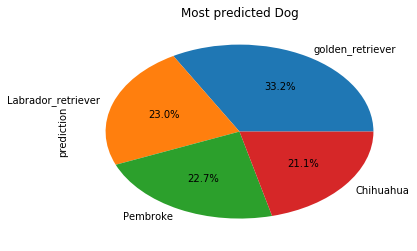

In [27]:
# Task 4:Storing, analyzing, and visualizing data Cell 4/7
#Thirdly: Visualizing data

#Question 1: What is the most predicted dog?
#Remove very rare dog types
Popular_Dogs = df['prediction'].value_counts()
Popular_Dogs[Popular_Dogs > 50].plot(kind='pie',autopct='%1.1f%%');
plt.title('Most predicted Dog')

Text(0.5,1,'Most Dog Stage')

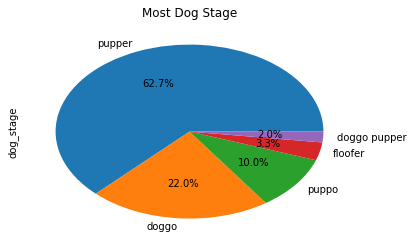

In [28]:
# Task 4:Storing, analyzing, and visualizing data Cell 5/7
#Visualizing data

#Question 2: What is the most common dog stage?
Dogs_Stages = df['dog_stage'].value_counts()
Dogs_Stages.drop('None').plot(kind='pie',autopct='%1.1f%%');
plt.title('Most Dog Stage')

Text(0.5,1,'Dog Stages Vs. mean Ratings')

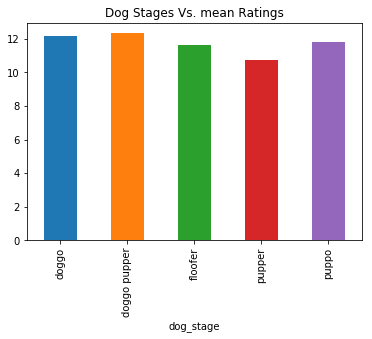

In [29]:
# Task 4:Storing, analyzing, and visualizing data Cell 6/7
#Visualizing data

#Question 3: which dog stage has the highest average ratings?
mean_ratings = df.groupby('dog_stage')['rating_numerator'].mean()
mean_ratings.drop('None').plot(kind='bar');
plt.title('Dog Stages Vs. mean Ratings')

Text(0.5,1,'Dog Stages Vs. max Ratings')

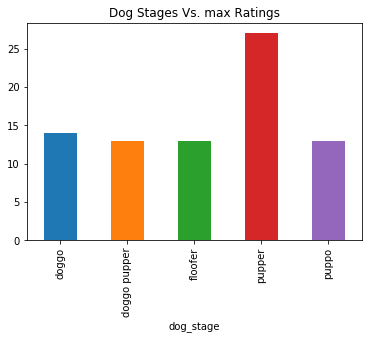

In [30]:
# Task 4:Storing, analyzing, and visualizing data Cell 7/7
#Visualizing data

#Question 4: which dog stage has the highest maximim ratings?
max_ratings = df.groupby('dog_stage')['rating_numerator'].max()
max_ratings.drop('None').plot(kind='bar');
plt.title('Dog Stages Vs. max Ratings')

From the above charts, we can conclude the following:
1. The most common dog types predicted are; Golden_retriever, Labrador_retriever,  pembroke, Chihuahua.
2. The most common dog stage in tweets is pupper, while the least common are tweets with dogs in both doggo and pupper.
3. The maximum rating was for a pupper.